In [25]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [27]:
df = pd.read_csv("Data_for_modeling_VC_BO.csv")
df.head()

,Fund_Id,Fund_Name,Firm_Name,Fund_Type,Fund_Size,Fund_Number_Overall,Fund_Number_Series,Called_Pcent,Distr_DPI_Pcent,Value_RVPI_Pcent,...,Local_Currency_USD,Local_Currency_EUR,Fund_Status_Closed,Fund_Status_Liquidated,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME
0,3,1818 Fund II,Brown Brothers Harriman,Buyout,475.0,2,2,88.5,180.74,0.0,...,1,0,0,1,1,0,0,0,0,0.914287
1,9,Riverside Capital Appreciation Fund 2000,Riverside Company,Buyout,412.8,4,3,91.5,175.80,0.0,...,1,0,0,1,1,0,0,0,0,1.463056
2,4004,Riverside Capital Appreciation Fund 2003,Riverside Company,Buyout,750.0,5,4,98.2,203.90,0.0,...,1,0,0,1,1,0,0,0,0,1.819914
3,12736,Riverside Capital Appreciation Fund V,Riverside Company,Buyout,1170.0,10,5,94.9,123.80,19.1,...,1,0,1,0,1,0,0,0,1,0.917017
4,12737,Riverside Micro-Cap Fund II,Riverside Company,Buyout,137.0,9,2,123.5,377.20,125.3,...,1,0,1,0,1,0,0,0,1,3.149979


In [28]:
df.shape

(1719, 30)

In [29]:
df_vc_s = pd.read_csv("VC.csv")
df_vc_s = df_vc_s.drop(['Unnamed: 0'], axis =1)
df_vc_s.shape

(661, 2)

In [30]:
df = df.merge(df_vc_s, how="inner", on=["Fund_Id"])

In [31]:
df.isna().sum()

Fund_Id                           0
Fund_Name                         0
Firm_Name                         0
Fund_Type                         0
Fund_Size                         0
Fund_Number_Overall               0
Fund_Number_Series                0
Called_Pcent                      0
Distr_DPI_Pcent                   0
Value_RVPI_Pcent                  0
Multiple                          0
Net_IRR_Pcent                     0
GDP_yoy                           0
TR_10yrs                          0
yoy_MSCI                          0
Firm_Age                          0
Funds_Raised_Last_Year            0
Pcent_Increase_Funds_Last_Year    0
Fund_Type_Buyout                  0
Fund_Type_Venture_Cap             0
Local_Currency_USD                0
Local_Currency_EUR                0
Fund_Status_Closed                0
Fund_Status_Liquidated            0
Fund_Focus_US                     0
Fund_Focus_Europe                 0
Fund_Focus_Asia                   0
Geographic_Scope_Diversified

# Dropping Columns 

In [32]:
# Dropping columns 
df.drop(["Fund_Id","Fund_Type", "Fund_Name","Firm_Name", "Net_IRR_Pcent", 
"Called_Pcent", "Distr_DPI_Pcent", "Value_RVPI_Pcent", "Multiple", 
"Fund_Status_Closed", "Fund_Status_Liquidated" ], axis=1, inplace=True)

In [33]:
df[df.Fund_Type_Buyout != 1].count()

Fund_Size                         661
Fund_Number_Overall               661
Fund_Number_Series                661
GDP_yoy                           661
TR_10yrs                          661
yoy_MSCI                          661
Firm_Age                          661
Funds_Raised_Last_Year            661
Pcent_Increase_Funds_Last_Year    661
Fund_Type_Buyout                  661
Fund_Type_Venture_Cap             661
Local_Currency_USD                661
Local_Currency_EUR                661
Fund_Focus_US                     661
Fund_Focus_Europe                 661
Fund_Focus_Asia                   661
Geographic_Scope_Diversified      661
Industry_Diversified              661
PME                               661
VC_Specialized                    661
dtype: int64

# Division of data set into two as per Buyout and venture capital

In [34]:
df = df[df.Fund_Type_Buyout == 0]

# Target Variable

In [35]:
df['PME'].describe()

count    661.000000
mean       1.156664
std        1.302218
min        0.000000
25%        0.639918
50%        0.948741
75%        1.335887
max       17.974445
Name: PME, dtype: float64

<AxesSubplot:>

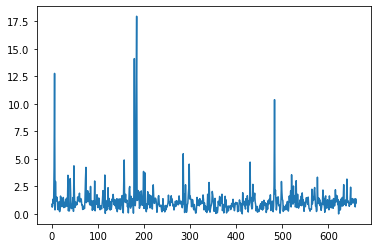

In [36]:
df["PME"].plot()

In [37]:
df["PME"]=   df["PME"].apply(lambda x: float(int(1) if x >= 1 else int(0)))

In [38]:
df.head(2)

,Fund_Size,Fund_Number_Overall,Fund_Number_Series,GDP_yoy,TR_10yrs,yoy_MSCI,Firm_Age,Funds_Raised_Last_Year,Pcent_Increase_Funds_Last_Year,Fund_Type_Buyout,Fund_Type_Venture_Cap,Local_Currency_USD,Local_Currency_EUR,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME,VC_Specialized
0,250.0,1,1,6.25,7.085181,3.357416,5,176,0.454545,0,1,1,0,1,0,0,0,0,0.0,0
1,225.0,5,3,6.46,6.030279,-14.049835,28,827,0.554511,0,1,1,0,0,1,0,0,0,0.0,0


In [39]:
# Numerical columns
num_cols = ["Fund_Size", "GDP_yoy", "TR_10yrs", "yoy_MSCI", "Firm_Age", 
"Funds_Raised_Last_Year", "Pcent_Increase_Funds_Last_Year"]

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [41]:
df.head(2)

,Fund_Size,Fund_Number_Overall,Fund_Number_Series,GDP_yoy,TR_10yrs,yoy_MSCI,Firm_Age,Funds_Raised_Last_Year,Pcent_Increase_Funds_Last_Year,Fund_Type_Buyout,Fund_Type_Venture_Cap,Local_Currency_USD,Local_Currency_EUR,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME,VC_Specialized
0,-0.222539,1,1,0.656718,1.414006,-0.379895,-0.681453,-1.372205,1.072021,0,1,1,0,1,0,0,0,0,0.0,0
1,-0.294924,5,3,0.775701,0.759936,-1.437382,1.577624,0.081859,1.486475,0,1,1,0,0,1,0,0,0,0.0,0


In [42]:
# Dropping columns 
df.drop(["Fund_Type_Buyout", "Fund_Type_Venture_Cap"], axis=1, inplace=True)

In [43]:
df.to_csv("Data_VC.csv", index = False)

In [44]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
Y = df["PME"]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [45]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))

# Compairing Accuracy

C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.532451 (0.073525)
LDA: 0.524921 (0.070064)
KNN: 0.568815 (0.075313)
CART: 0.555360 (0.054958)
NB: 0.594482 (0.047364)
SVM: 0.583967 (0.073017)
QDA: 0.493171 (0.097632)


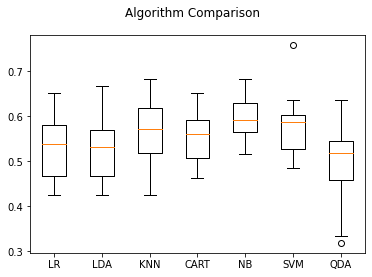

In [47]:
seed = 42
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# compairing Precision

C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.485555 (0.109587)
LDA: 0.473831 (0.113294)
KNN: 0.540709 (0.100503)
CART: 0.504450 (0.102738)
NB: 0.582698 (0.132154)
SVM: 0.585398 (0.135452)
QDA: 0.465518 (0.089511)


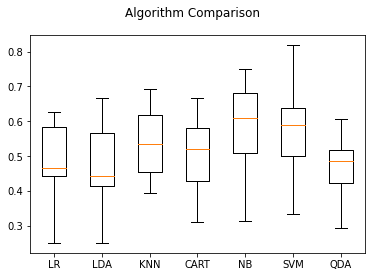

In [48]:
seed = 42
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Neural network

In [49]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
y = df["PME"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

In [50]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)


C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
confusion_matrix(y_test,mlp_predictions)

array([[57, 32],
       [38, 39]], dtype=int64)

In [52]:
print(classification_report(y_test, mlp_predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62        89
         1.0       0.55      0.51      0.53        77

    accuracy                           0.58       166
   macro avg       0.57      0.57      0.57       166
weighted avg       0.58      0.58      0.58       166

